# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Аналитика портфолио/netflix_users_data.csv')

In [ ]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

# Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split()
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

# Применяем функцию ко всем столбцам DataFrame
df.columns = [to_camel_case(col) for col in df.columns]

# Проверяем результат
print(df.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')


# Приведение типов данных

In [ ]:
# Приведем столбец 'OrderDate' к типу datetime
df['joinDate'] = df['joinDate'].astype(str)
df['lastPaymentDate'] = df['lastPaymentDate'].astype(str)
df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y').dt.strftime('%Y-%m-%d')
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'],format='%d-%m-%y').dt.strftime('%Y-%m-%d')

In [ ]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [ ]:

# Получение первой и последней даты
first_date = df['joinDate'].min()
last_date = df['joinDate'].max()

print(f'Первая дата в joinDate: {first_date}')
print(f'Последняя дата в joinDate: {last_date}')

Первая дата в joinDate: 2021-09-05
Последняя дата в joinDate: 2023-06-14


# Поиск дублей и пропусков в данных

In [ ]:
# Поиск дубликатов
duplicates = df[df.duplicated(keep=False)]  # keep=False показывает все дубликаты
print("Дубликаты:")
print(duplicates)

# Поиск пропусков
missing_values = df.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_values = missing_values[missing_values > 0]  # Оставляет только столбцы с пропусками
print("\nПропуски:")
print(missing_values)

# Дополнительно: Вывод общего количества дубликатов и пропусков
total_duplicates = df.duplicated().sum()
total_missing = missing_values.sum()

print(f"\nОбщее количество дубликатов: {total_duplicates}")
print(f"Общее количество пропусков: {total_missing}")

Дубликаты:
Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []

Пропуски:
Series([], dtype: int64)

Общее количество дубликатов: 0
Общее количество пропусков: 0


In [ ]:
df.isna().sum()

,0
userId,0
subscriptionType,0
monthlyRevenue,0
joinDate,0
lastPaymentDate,0
country,0
age,0
gender,0
device,0
planDuration,0


# Исследовательский анализ данных

In [ ]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [ ]:
# сколько уникальных пользователей?

unique_users = df['userId'].nunique()
print(f"Количество уникальных пользователей: {unique_users}")

Количество уникальных пользователей: 2500


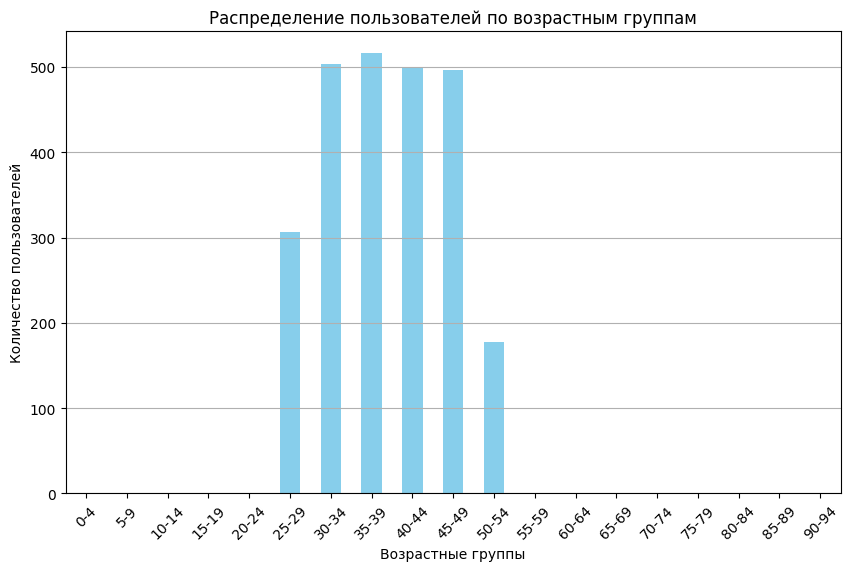

In [ ]:
# изучить возраст пользователей (визуализировать)
import pandas as pd
import matplotlib.pyplot as plt

# Создание корзин по возрастам с шагом в 5 лет
bins = range(0, 100, 5)  # можно изменить верхнюю границу, если требуется
labels = [f'{i}-{i+4}' for i in bins[:-1]]  # создаем метки для корзин

# Добавляем новую колонку с категориями возраста
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Подсчет количества пользователей в каждой возрастной группе
age_distribution = df['age_group'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение пользователей по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

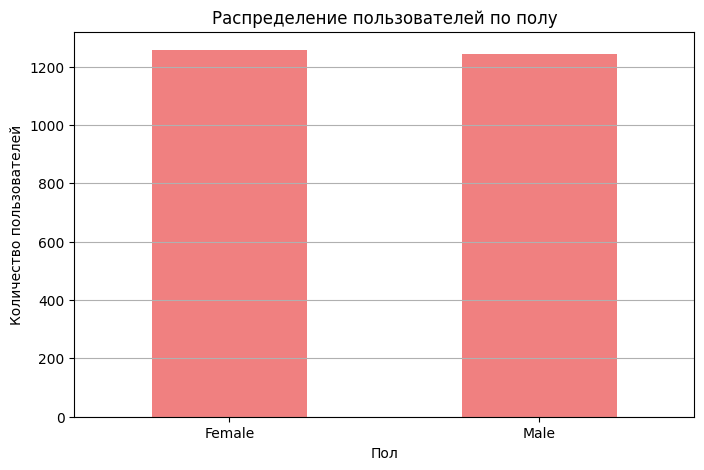

In [ ]:
# изучить пол пользователей (визуализировать)
# Подсчет количества пользователей по полу
gender_distribution = df['gender'].value_counts()

# Визуализация
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='bar', color='lightcoral')
plt.title('Распределение пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


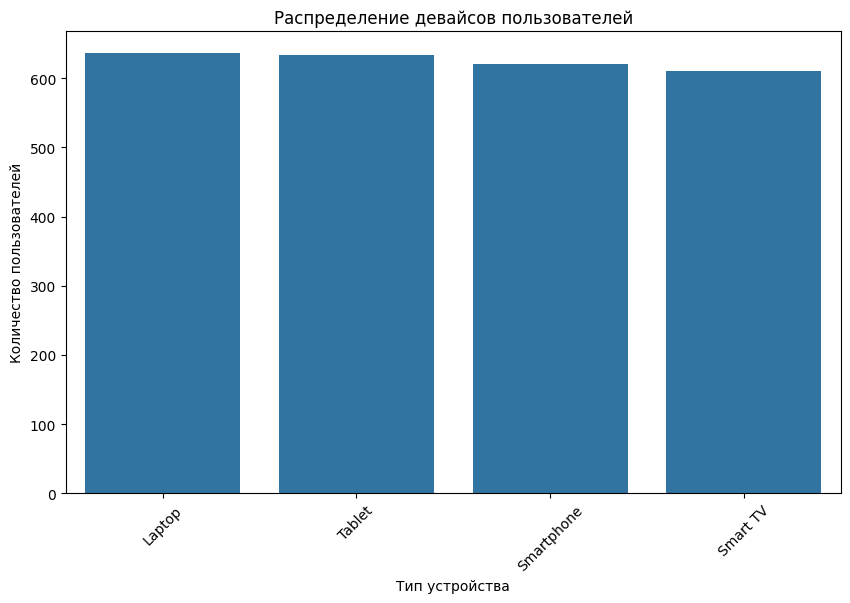

In [ ]:
# изучить девайсы пользователей (визуализировать)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Визуализация распределения девайсов пользователей
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='device', order=df['device'].value_counts().index)
plt.title('Распределение девайсов пользователей')
plt.xlabel('Тип устройства')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

<ipython-input-63-4151fd30340e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='country', order=country_counts.index, palette='viridis')  # Используем палитру цветов


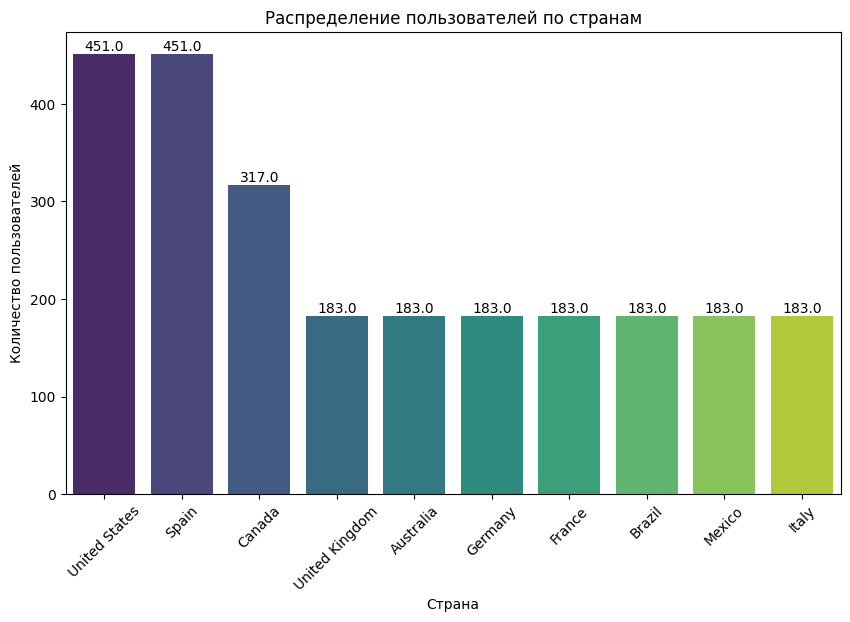

In [ ]:
# изучить локацию пользователей (визуализировать)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что df уже загружен и содержит столбец 'country'

# Сортируем данные по количеству пользователей в каждой стране
country_counts = df['country'].value_counts()

# Визуализация распределения пользователей по странам
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', order=country_counts.index, palette='viridis')  # Используем палитру цветов
plt.title('Распределение пользователей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)

# Добавляем текст на столбцы для большего удобства
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()


<ipython-input-74-76f3d11a7d4f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subscriptionType', order=df['subscriptionType'].value_counts().index, palette='Set2')


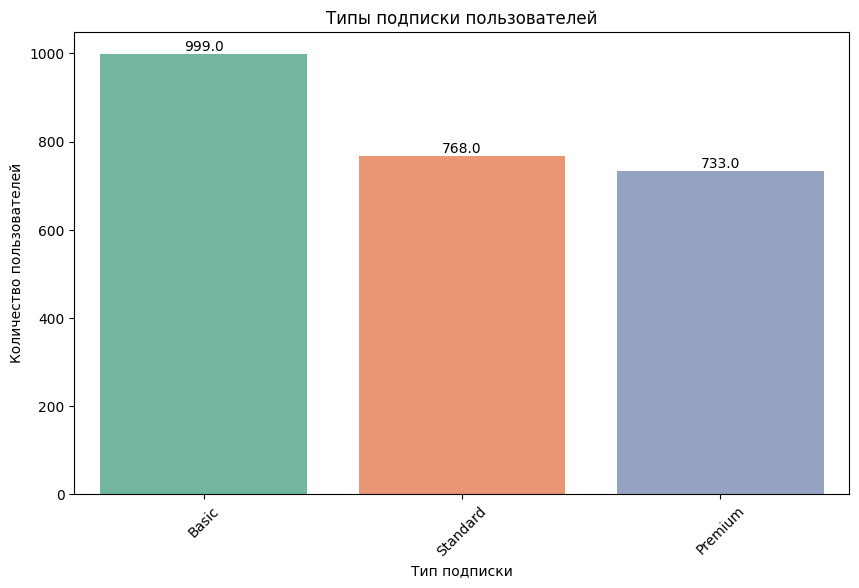

In [ ]:
# изучить тип подписки пользователей (визуализировать)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что df уже загружен и содержит необходимые столбцы

# Визуализация типов подписки пользователей
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subscriptionType', order=df['subscriptionType'].value_counts().index, palette='Set2')
plt.title('Типы подписки пользователей')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)

# Добавляем текст на столбцы для большего удобства
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()

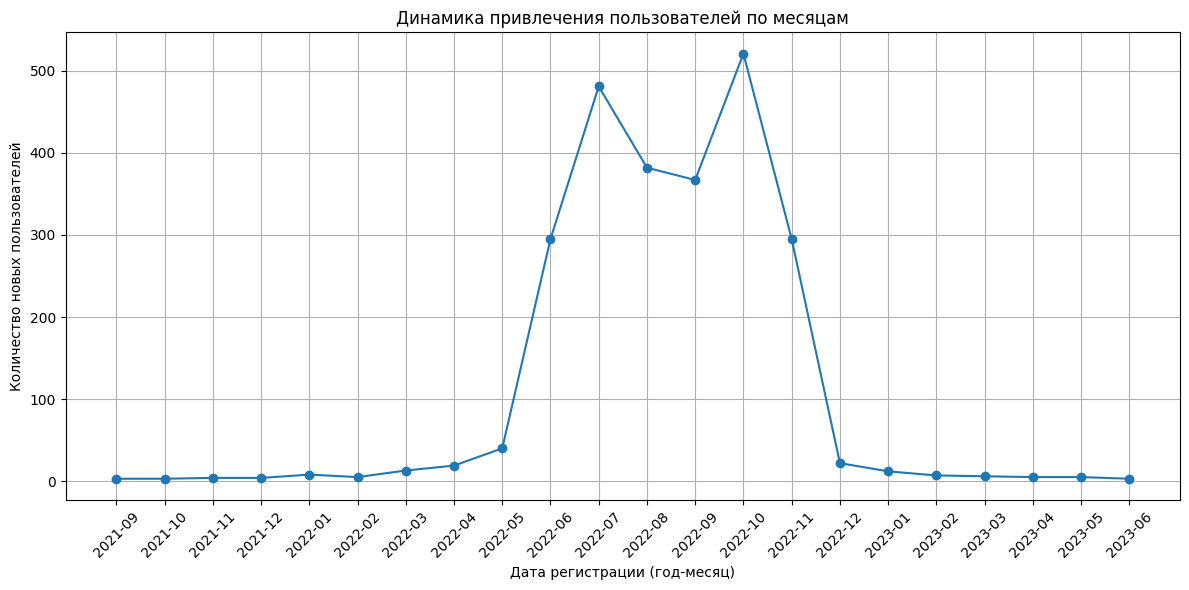

In [ ]:
# изучить динамику привлечения пользователей (Join Date)
import pandas as pd
import matplotlib.pyplot as plt

# Предполагается, что df уже загружен и содержит необходимые поля, включая 'joinDate'

# Убедимся, что 'joinDate' в формате datetime
df['joinDate'] = pd.to_datetime(df['joinDate'])

# Создаем новый столбец с месяцем и годом
df['joinYearMonth'] = df['joinDate'].dt.to_period('M')

# Группируем данные по месяцу и считаем количество пользователей
monthly_users = df.groupby('joinYearMonth').size().reset_index(name='user_count')

# Визуализация динамики привлечения пользователей
plt.figure(figsize=(12, 6))
plt.plot(monthly_users['joinYearMonth'].astype(str), monthly_users['user_count'], marker='o')
plt.title('Динамика привлечения пользователей по месяцам')
plt.xlabel('Дата регистрации (год-месяц)')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  # Убедимся, что элементы не накладываются
plt.show()



Общая выручка сервиса: 306965
Данные для графика динамики накопленной выручки:
joinDate
2021-09-05       315
2021-09-15       567
2021-09-27       819
2021-10-08      1059
2021-10-18      1299
               ...  
2023-05-17    306965
2023-05-27    306965
2023-06-02    306965
2023-06-10    306965
2023-06-14    306965
Name: cumulativeRevenue, Length: 300, dtype: int64


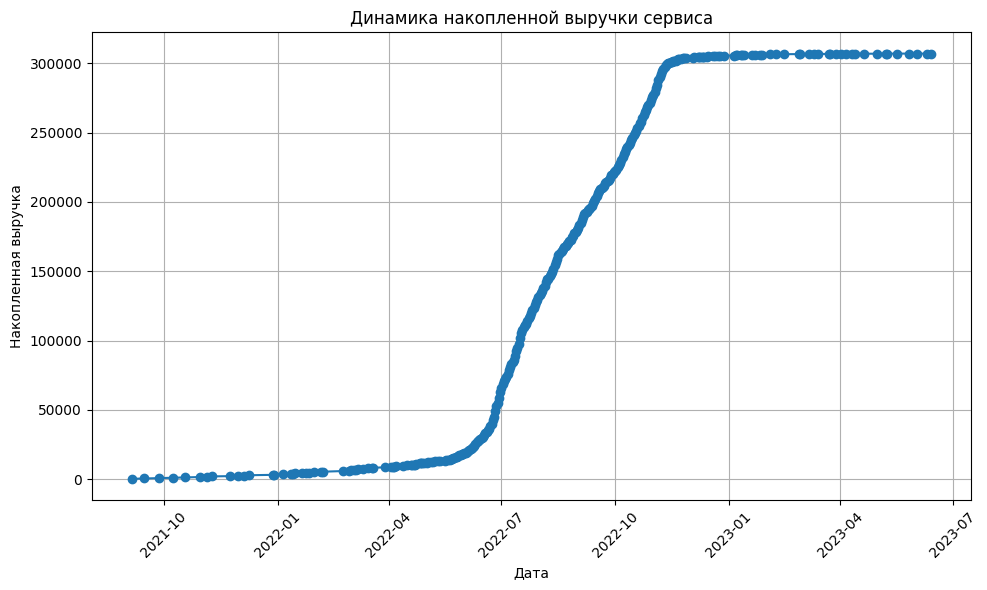

In [ ]:
# изучить динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)
df['joinDate'] = pd.to_datetime(df['joinDate'])
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

# Рассчитываем количество месяцев между joinDate и lastPaymentDate
df['months_active'] = ((df['lastPaymentDate'] - df['joinDate']) / pd.Timedelta(days=30)).astype(int)

# Рассчитываем накопленную выручку для каждого пользователя
df['cumulativeRevenue'] = df['monthlyRevenue'] * df['months_active']

# Вычисляем общую выручку сервиса
total_revenue = df['cumulativeRevenue'].sum()
print(f'Общая выручка сервиса: {total_revenue}')

# Построение графика динамики накопленной выручки
plt.figure(figsize=(10, 6))

# Группируем по дате и суммируем выручку
revenue_over_time = df.groupby('joinDate')['cumulativeRevenue'].sum().cumsum()

# Выводим данные для графика
print("Данные для графика динамики накопленной выручки:")
print(revenue_over_time)

plt.plot(revenue_over_time.index, revenue_over_time.values, marker='o')
plt.title('Динамика накопленной выручки сервиса')
plt.xlabel('Дата')
plt.ylabel('Накопленная выручка')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-77-59c7810966b9>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('age_group')['monthlyRevenue'].sum().reset_index()
<ipython-input-77-59c7810966b9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_age_group, x='age_group', y='monthlyRevenue', palette='viridis')


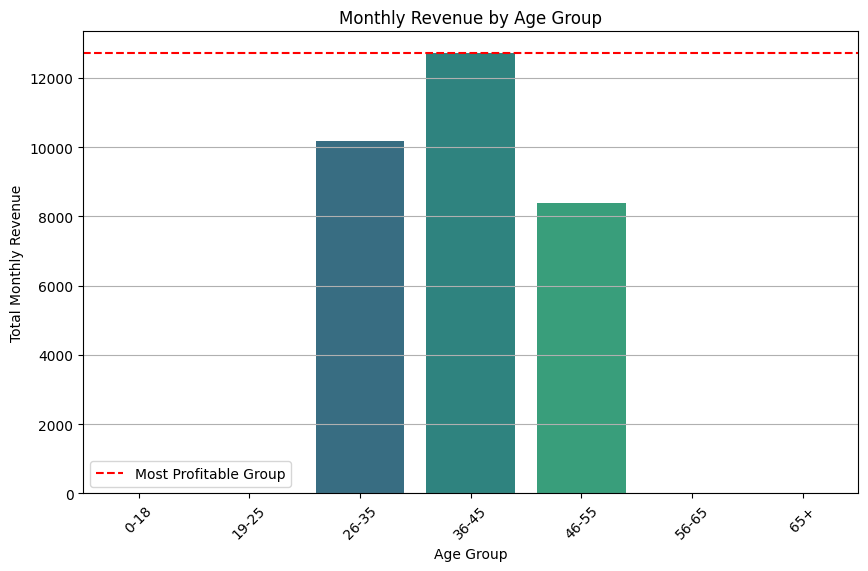

Самая платежеспособная группа:
age_group         36-45
monthlyRevenue    12707
Name: 3, dtype: object


In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Создание возрастных корзин
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Границы корзин
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Группировка по возрастным корзинам и суммирование дохода
revenue_by_age_group = df.groupby('age_group')['monthlyRevenue'].sum().reset_index()

# Определение самой платежеспособной группы
most_profitable_group = revenue_by_age_group.loc[revenue_by_age_group['monthlyRevenue'].idxmax()]

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_age_group, x='age_group', y='monthlyRevenue', palette='viridis')
plt.title('Monthly Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Revenue')
plt.xticks(rotation=45)
plt.axhline(y=most_profitable_group['monthlyRevenue'], color='r', linestyle='--', label='Most Profitable Group')
plt.legend()
plt.grid(axis='y')
plt.show()

# Вывод информации о самой платежеспособной группе
print("Самая платежеспособная группа:")
print(most_profitable_group)

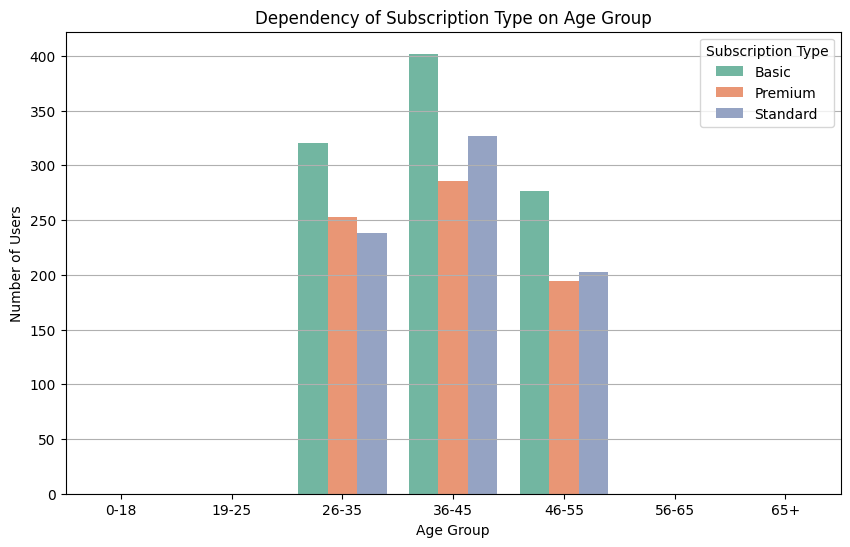

In [ ]:
# посмотреть зависимость типа тарифа от группы возраста пользователя
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Создание возрастных корзин
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Границы корзин
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Построение графика зависимости типа тарифа от группы возраста
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='subscriptionType', palette='Set2', dodge=True)
plt.title('Dependency of Subscription Type on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Subscription Type')
plt.grid(axis='y')
plt.show()

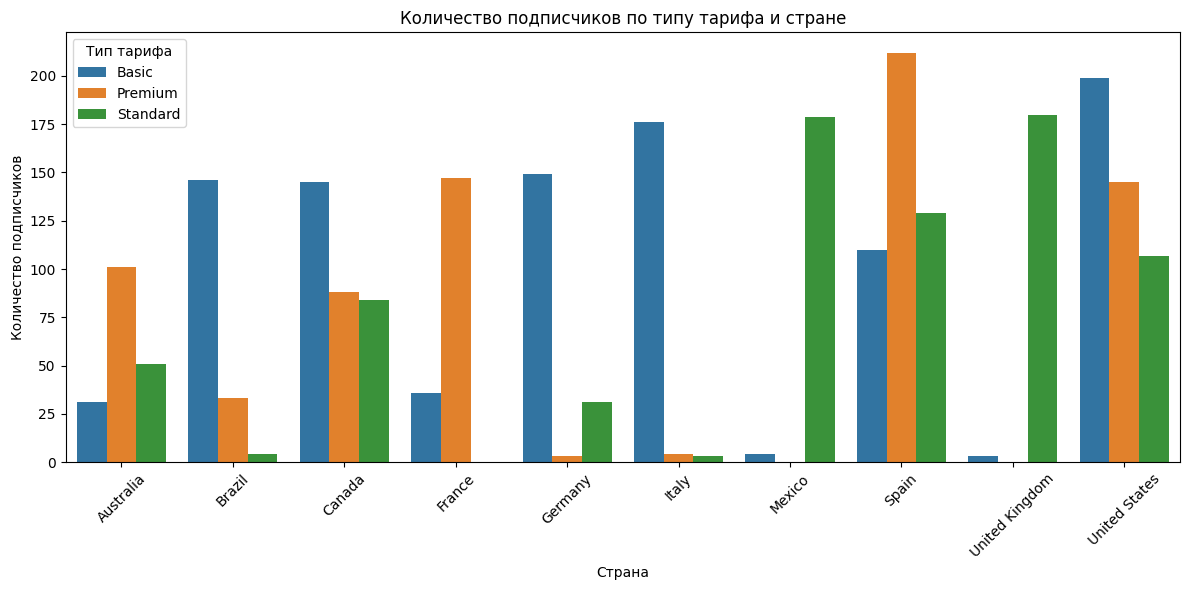

In [ ]:
# посмотреть зависимость типа тарифа от страны пользователя
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





# Группировка данных по стране и типу подписки
subscription_counts = df.groupby(['country', 'subscriptionType']).size().reset_index(name='count')



# Настройка графика
plt.figure(figsize=(12, 6))
sns.barplot(data=subscription_counts, x='country', y='count', hue='subscriptionType')

# Настройка заголовка и меток
plt.title('Количество подписчиков по типу тарифа и стране')
plt.xlabel('Страна')
plt.ylabel('Количество подписчиков')
plt.xticks(rotation=45)
plt.legend(title='Тип тарифа')
plt.tight_layout()

# Показать график
plt.show()

<ipython-input-83-13c4b850bda2>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subscription_counts = df.groupby(['age_group', 'subscriptionType']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

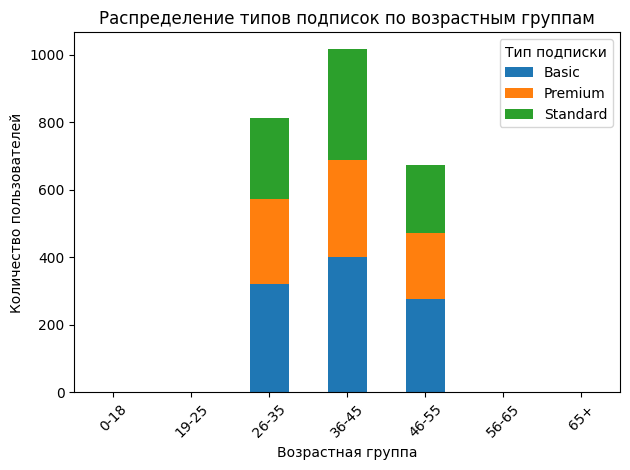

Группы с наибольшим соотношением премиум-подписок:
  age_group  premium_ratio
2     26-35       0.311961
4     46-55       0.287834
3     36-45       0.281773
0      0-18            NaN
1     19-25            NaN
5     56-65            NaN
6       65+            NaN


<ipython-input-83-13c4b850bda2>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_groups, x='age_group', y='premium_ratio', palette='viridis')


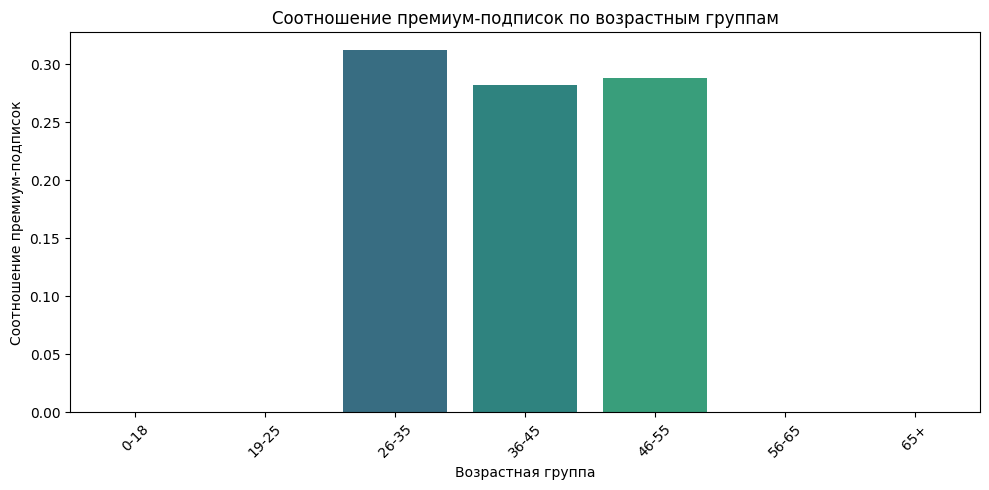

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных в DataFrame
# df = pd.read_csv('path_to_your_file.csv')

# 1. Создание возрастных групп
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Границы корзин
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 2. Группировка данных по возрастным группам и типу подписки
age_subscription_counts = df.groupby(['age_group', 'subscriptionType']).size().unstack(fill_value=0)

# 3. Визуализация данных
plt.figure(figsize=(12, 6))
age_subscription_counts.plot(kind='bar', stacked=True)
plt.title('Распределение типов подписок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()

# 4. Анализ соотношения премиум-подписок
# Предположим, что премиум-подписка обозначается как 'Premium'
premium_counts = age_subscription_counts['Premium']
total_counts = age_subscription_counts.sum(axis=1)
premium_ratio = premium_counts / total_counts

# Создание DataFrame для анализа соотношения
premium_ratio_df = pd.DataFrame({
    'age_group': premium_ratio.index,
    'premium_ratio': premium_ratio.values
})

# Выделение групп с наибольшим соотношением премиум-подписок
top_groups = premium_ratio_df.sort_values(by='premium_ratio', ascending=False)

print("Группы с наибольшим соотношением премиум-подписок:")
print(top_groups)

# Визуализация соотношения премиум-подписок
plt.figure(figsize=(10, 5))
sns.barplot(data=top_groups, x='age_group', y='premium_ratio', palette='viridis')
plt.title('Соотношение премиум-подписок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Соотношение премиум-подписок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Выводы
Проведено исследование сервиса Netflix.
Сервисом пользуются одинаково и мужчины и женщины, одинаково на всех устройствах. Наибольшей популярностью пользуется базовый тариф.
С мая 2022 г. по декабрь 2022 г. наблюдается всплеск привлечения пользователей. Возможно, это было связано с какой-то маркетинговой программой. Однако после этого, объемы привлечения падают, тем не менее ежемесячная оплата не падает, значит клиенты были привлечены успешно и продолжают пользоваться сервисом.
Особого внимания требует анализ использования сервиса по странам. Рассмотреть возможности увеличения использования премиальных тарифов, особенно в странах, где этого практически нет.


In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка